# Task7 :  Heart Disease Prediction

  

**Background of Task 7: Heart Disease Prediction**

- Utilizes a dataset with medical data to predict heart disease.
- Features include age, blood pressure, cholesterol levels, etc.
- Aimed at early detection and risk assessment for heart disease.

**Benefits of Task 7:**

- Early detection for timely intervention.
- Enables personalized treatment plans based on patient factors.
- Optimizes healthcare resources by identifying high-risk individuals.
- Reduces healthcare costs through preventive measures.
- Improves patient outcomes with timely and targeted interventions.
- Supports population health management and informs public health initiatives.
- Enhances clinical decision support for healthcare professionals.
- Contributes valuable insights to ongoing medical research on heart disease.

# Import necessary libraries


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler,LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


# 1. Data Gathering:


In [3]:
data = pd.read_csv("./Heart_Disease_Prediction.csv")
data.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [4]:
## Check the size
data.shape

(270, 14)

In [5]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
## Check basic statistic
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
## Check basic statistic
data.describe(include = "all")

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [8]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


0

In [9]:
## Check for nan values

data.isna().sum() 


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [10]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [12]:
data["Heart Disease"].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [13]:
data.shape

(270, 14)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Age Distribution:

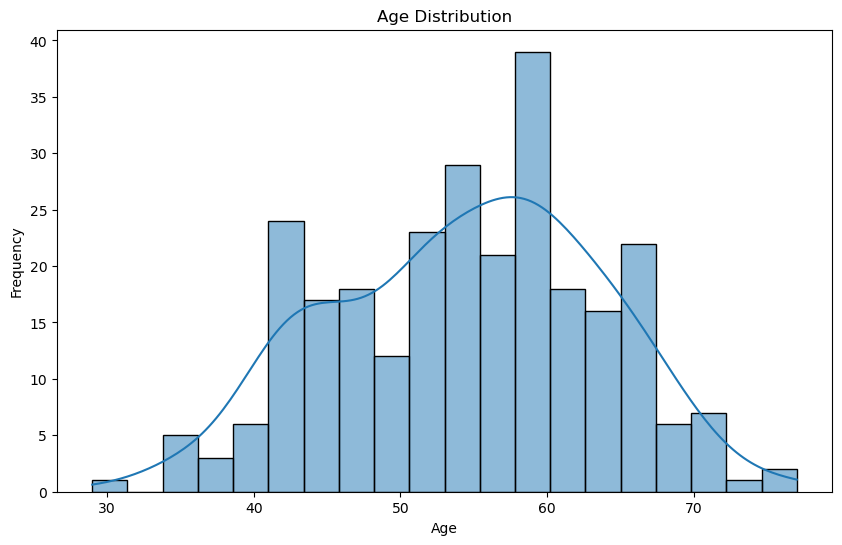

In [14]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## 2. Heart Disease Presence by Sex:

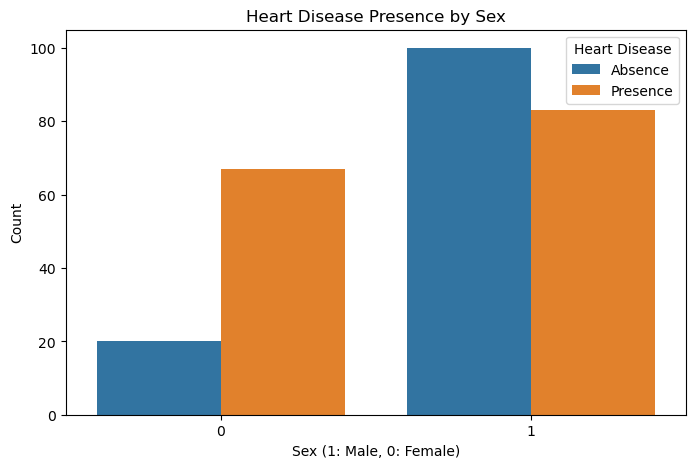

In [15]:
# Heart Disease Presence by Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Heart Disease', data=data)
plt.title('Heart Disease Presence by Sex')
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['Absence', 'Presence'])
plt.show()


## 3.Chest Pain Type Distribution:

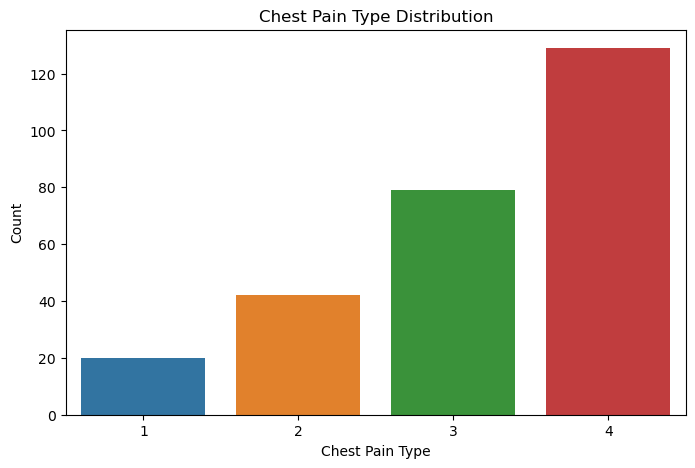

In [16]:
# Chest Pain Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Chest pain type', data=data)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


## 4.Cholesterol Levels Distribution:

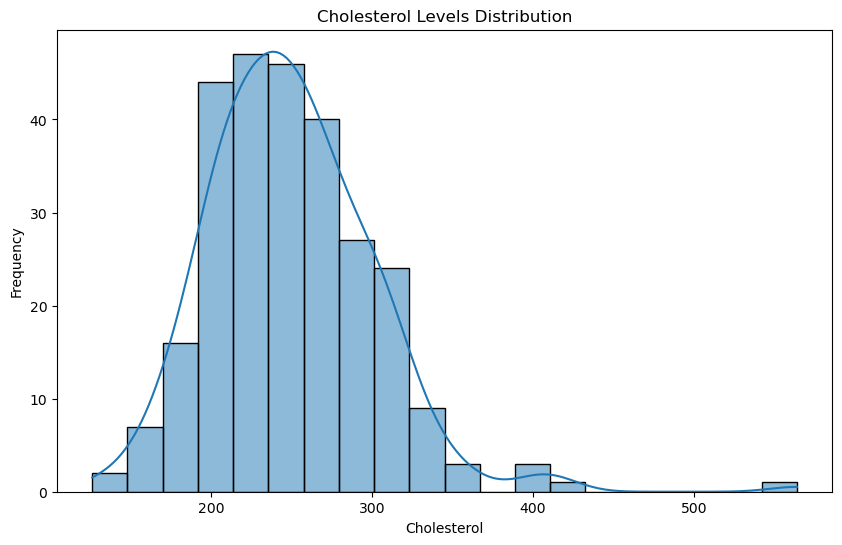

In [17]:
# Cholesterol Levels Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Cholesterol'], bins=20, kde=True)
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()


## 5. Heart Rate Distribution by Heart Disease Presence:

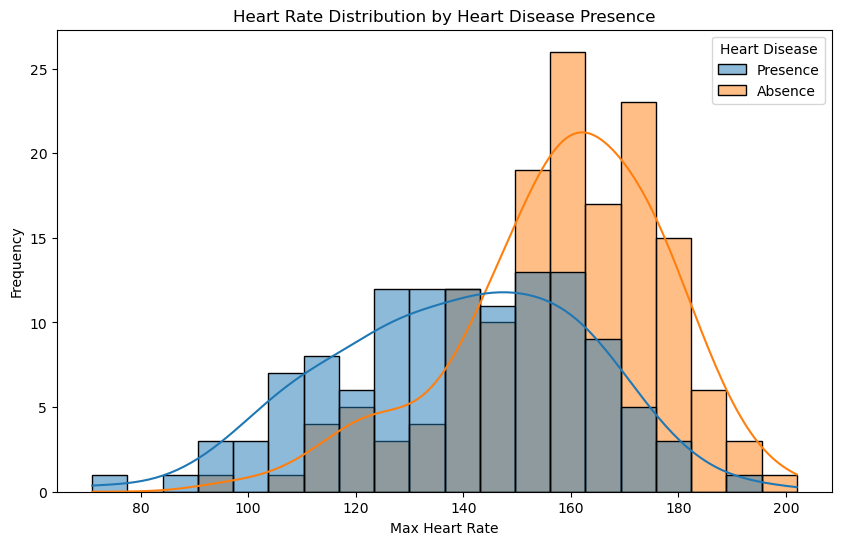

In [18]:
# Heart Rate Distribution by Heart Disease Presence
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Max HR', hue='Heart Disease', bins=20, kde=True, common_norm=False)
plt.title('Heart Rate Distribution by Heart Disease Presence')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()


## 6. Correlation Heatmap:

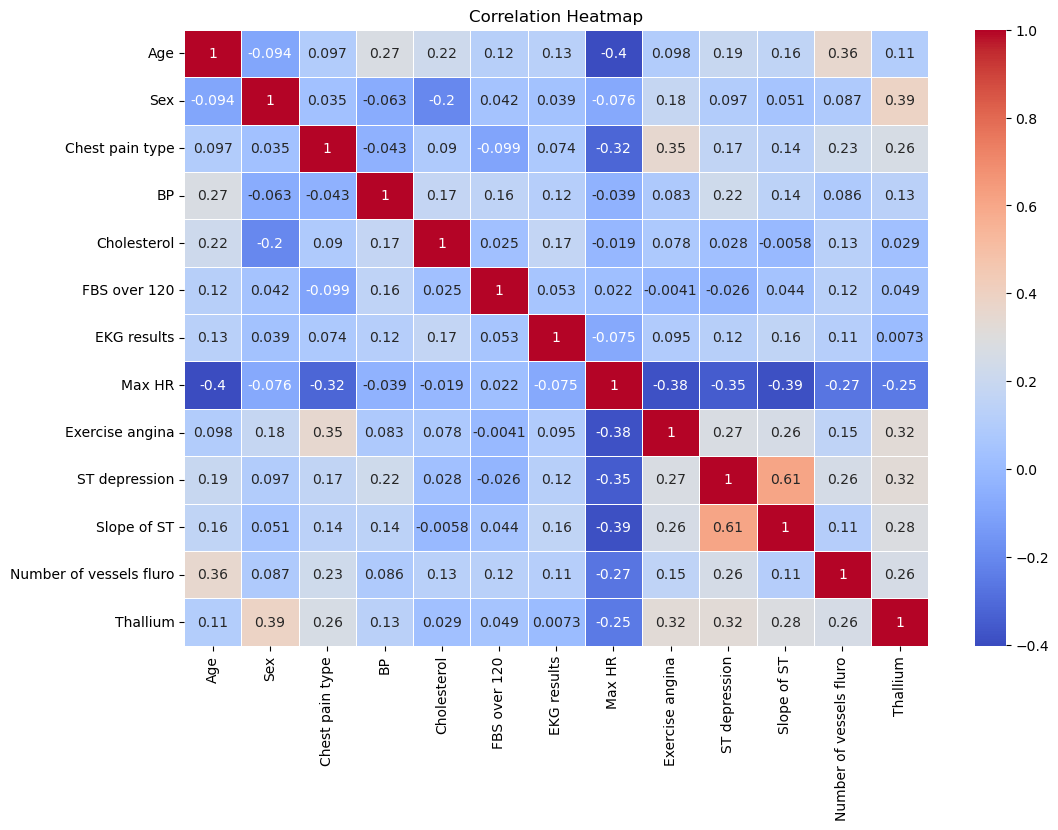

In [27]:
# Exclude non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## 7. Exercise-Induced Angina vs. Age:

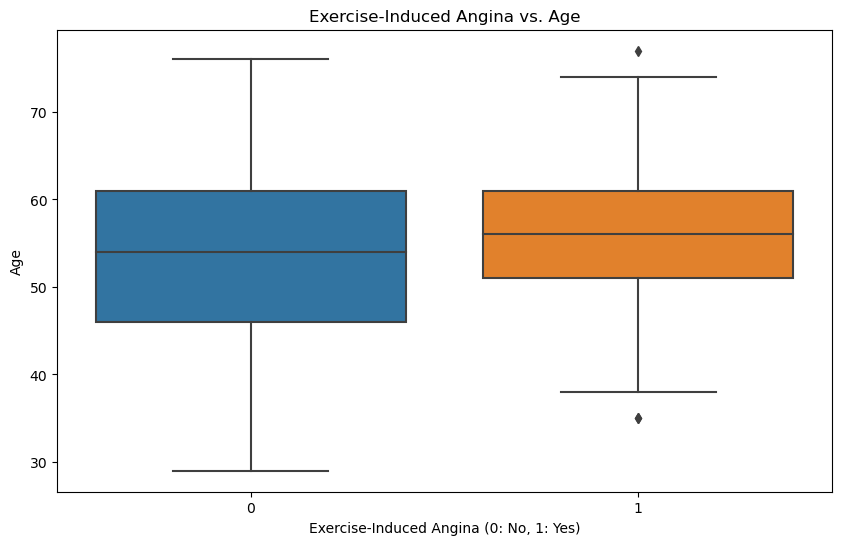

In [20]:
# Exercise-Induced Angina vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise angina', y='Age', data=data)
plt.title('Exercise-Induced Angina vs. Age')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


## 8. ST Depression vs. Slope of ST:

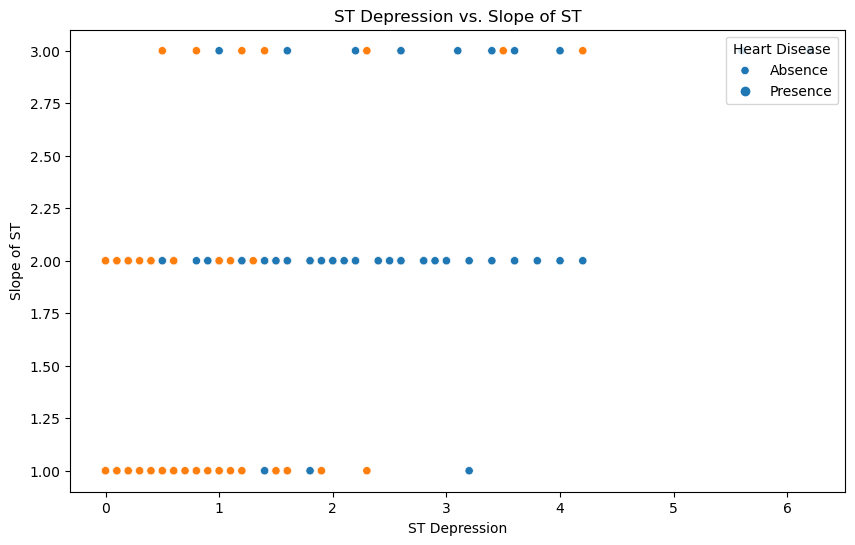

In [28]:
# ST Depression vs. Slope of ST
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ST depression', y='Slope of ST', data=data, hue='Heart Disease')
plt.title('ST Depression vs. Slope of ST')
plt.xlabel('ST Depression')
plt.ylabel('Slope of ST')
plt.legend(title='Heart Disease', loc='upper right', labels=['Absence', 'Presence'])
plt.show()


## 9. Number of Vessels Fluoroscopy Distribution:

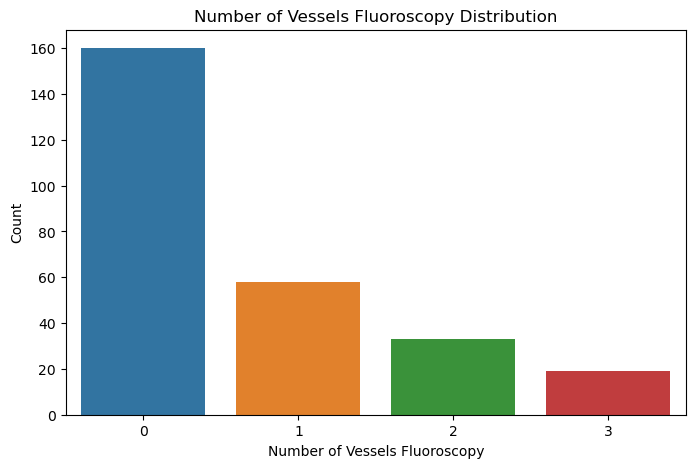

In [22]:
# Number of Vessels Fluoroscopy Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Number of vessels fluro', data=data)
plt.title('Number of Vessels Fluoroscopy Distribution')
plt.xlabel('Number of Vessels Fluoroscopy')
plt.ylabel('Count')
plt.show()


## 10. Thallium Distribution:

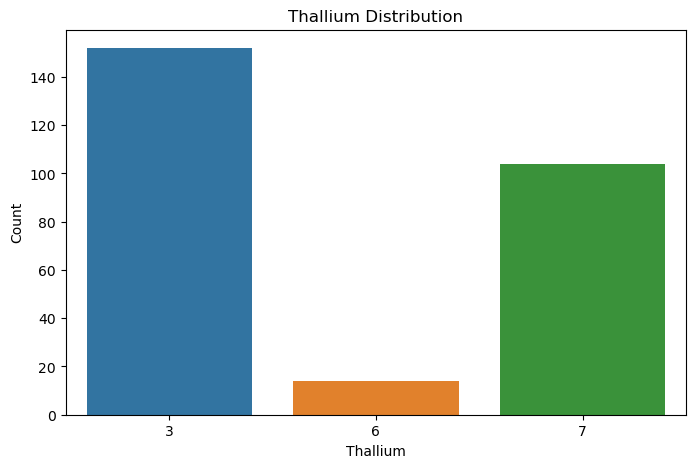

In [23]:
# Thallium Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Thallium', data=data)
plt.title('Thallium Distribution')
plt.xlabel('Thallium')
plt.ylabel('Count')
plt.show()


# 4. Data Preprocessing

In [31]:
scaler = StandardScaler()

numeric = ["Age","Sex","Chest pain type","BP","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium"]

transformer = ColumnTransformer([("num",scaler, numeric)])
x = data.drop("Heart Disease" ,axis = 1)

# Encode the 'species' column
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(data['Heart Disease'])

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (270, 12)
y shape : (270,)


In [32]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [33]:
x_train.shape

(216, 12)

In [34]:
x_test.shape

(54, 12)

In [35]:
y_train.shape

(216,)

In [36]:
y_test.shape

(54,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

In [38]:
class_names = [0, 1]
print(class_names)


[0, 1]


In [39]:
data.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


### GradientBoostingClassifier

In [40]:

mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 0.99
Test Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



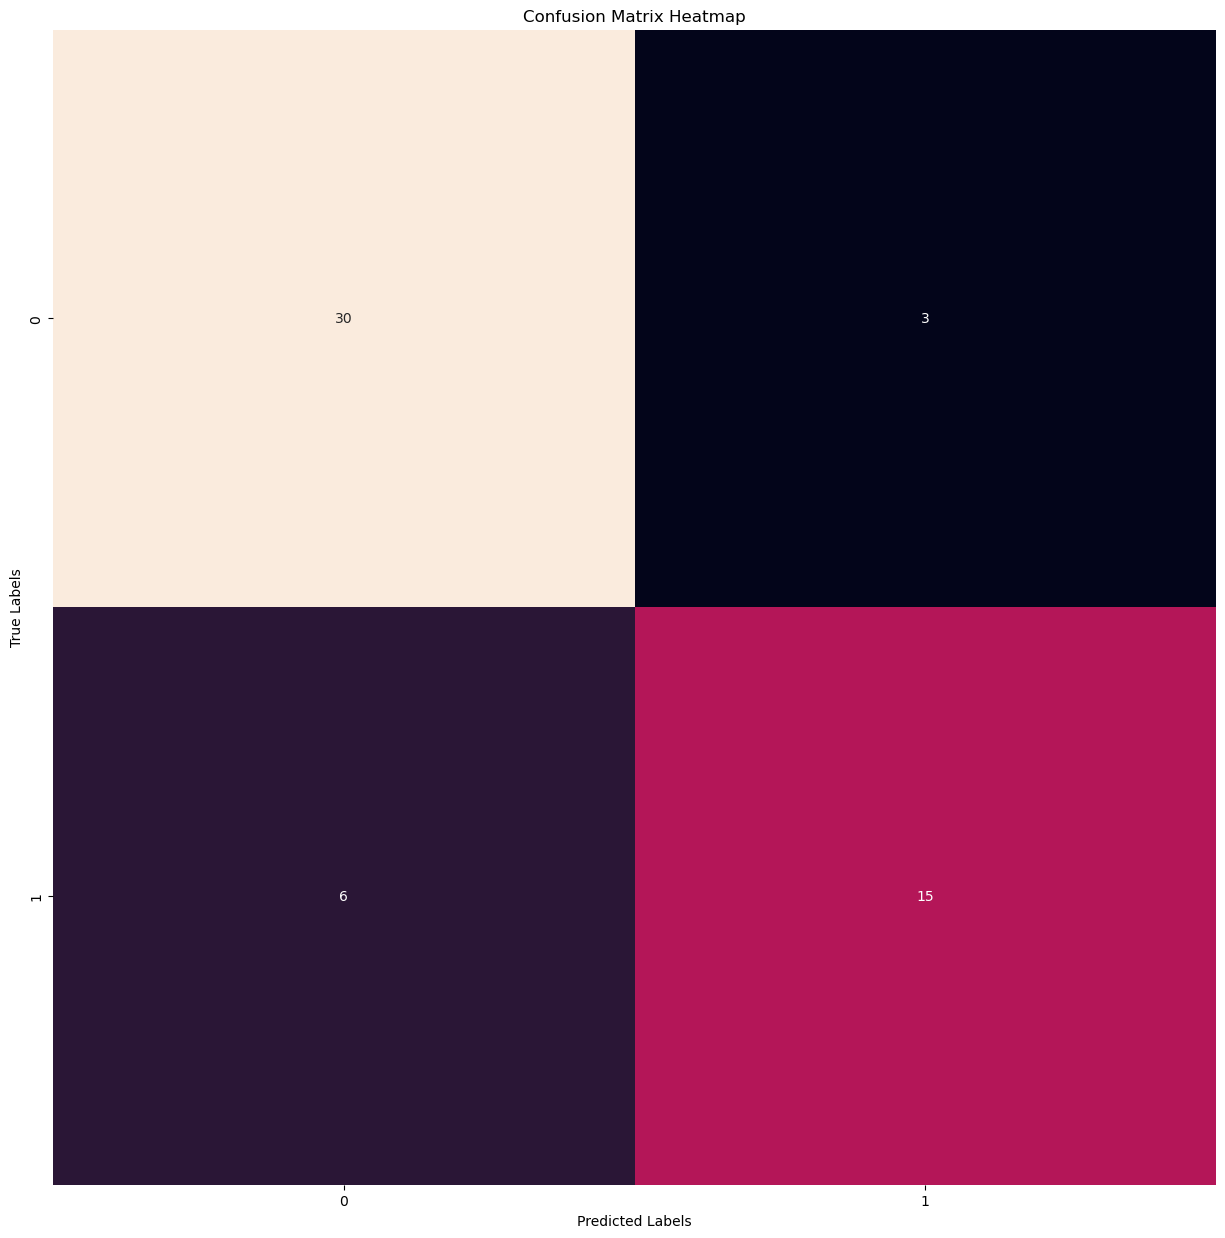

In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### LogisticRegression

In [42]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 0.8518518518518519
Model Score on Testing data 0.9074074074074074
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.86      0.90      0.88        20

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.90        54
weighted avg       0.91      0.91      0.91        54



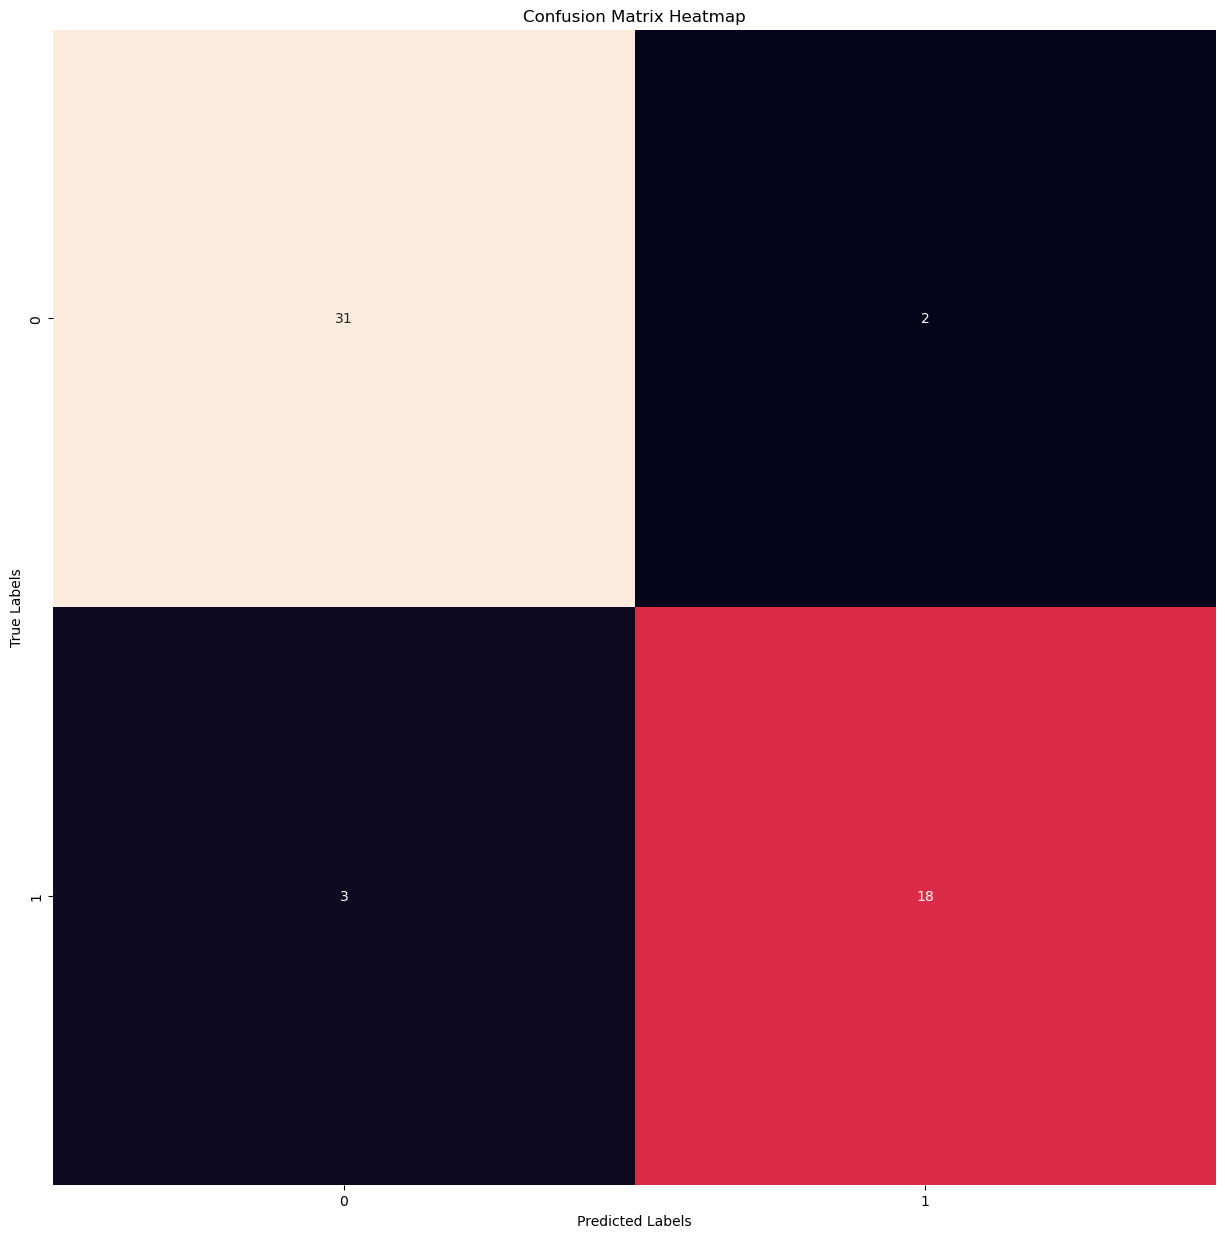

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Support Vector Machine ( SVC )

In [44]:


svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 0.8472222222222222
Model Score on Testing data 0.9074074074074074
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.86      0.90      0.88        20

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.90        54
weighted avg       0.91      0.91      0.91        54



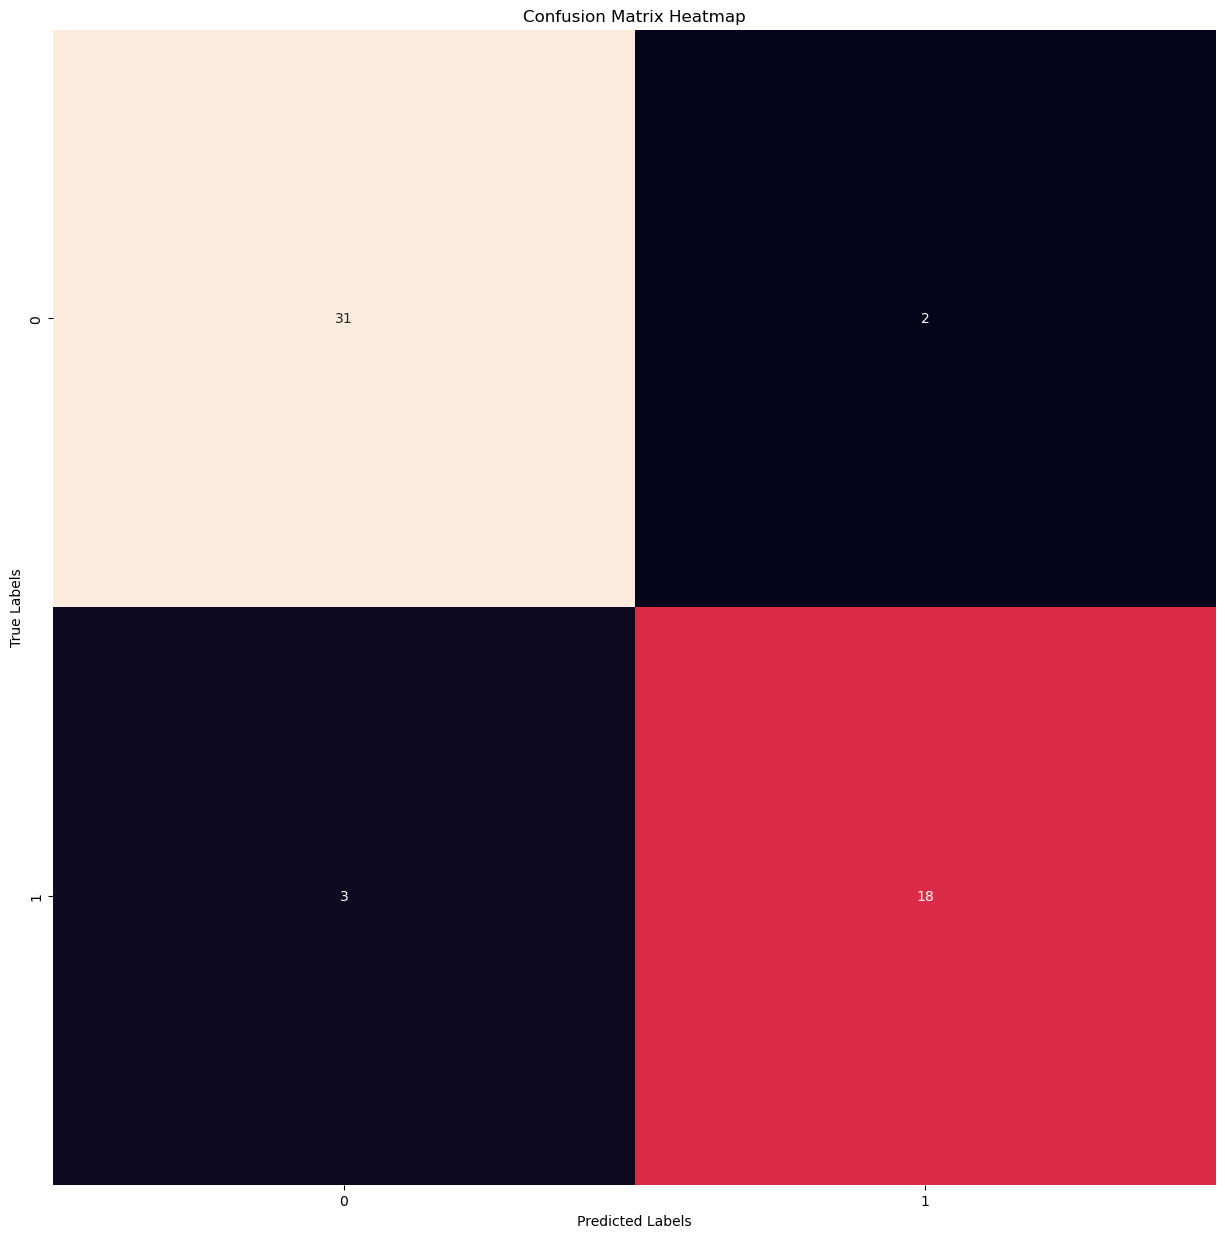

In [45]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### RandomForestClassifier

In [46]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       0.71      0.83      0.77        18

    accuracy                           0.83        54
   macro avg       0.81      0.83      0.82        54
weighted avg       0.84      0.83      0.84        54



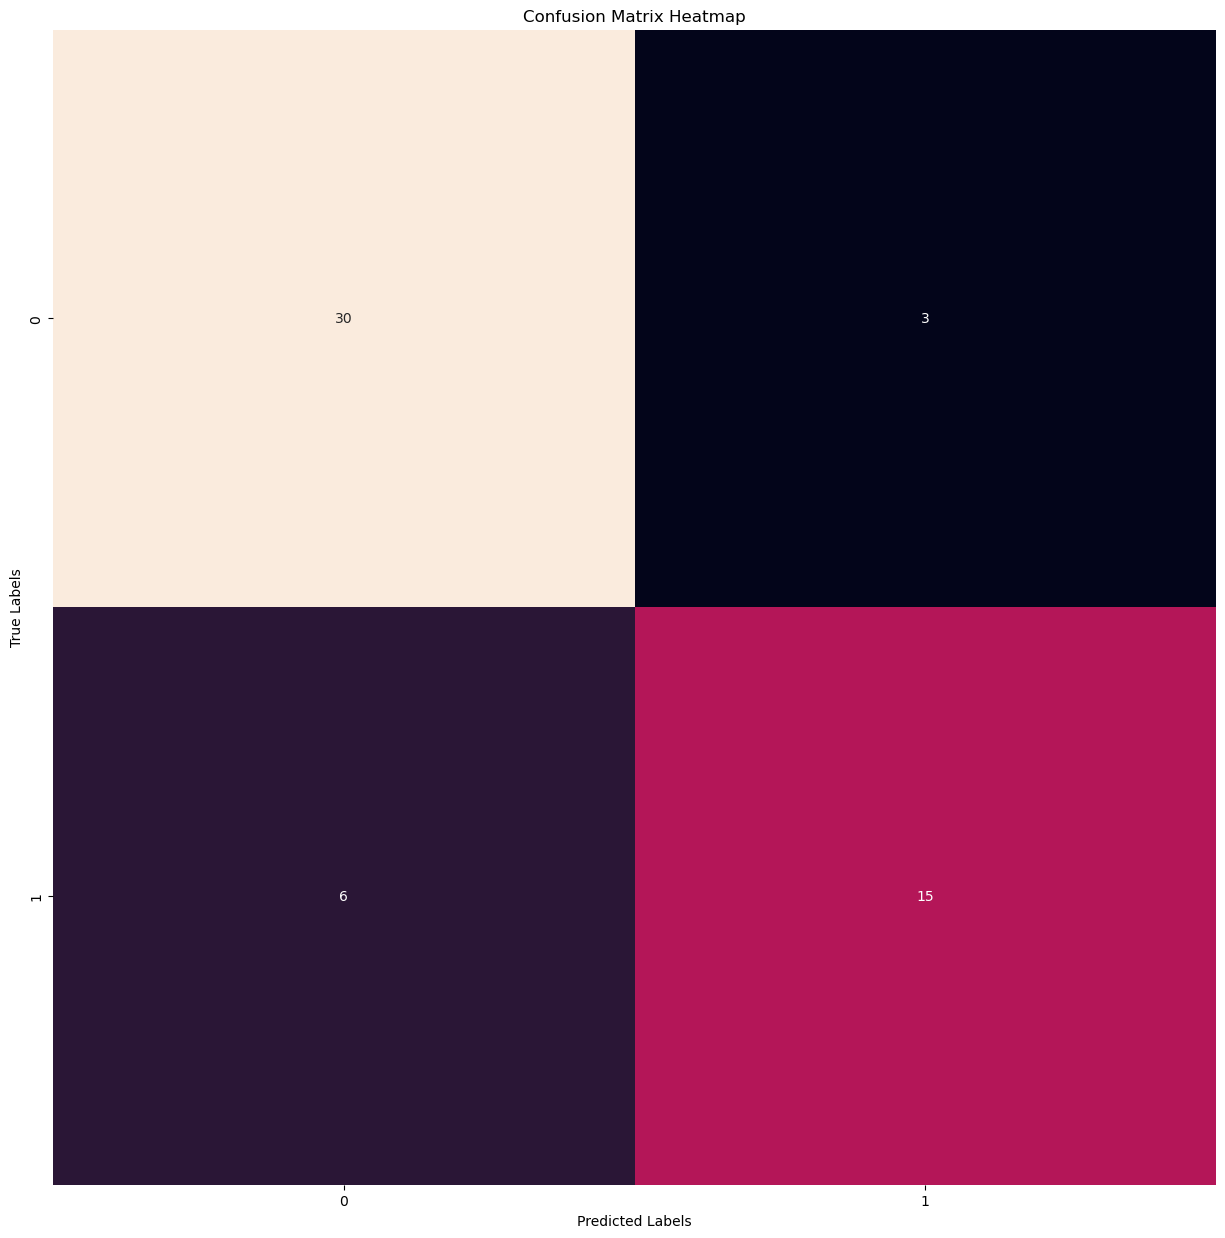

In [47]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

- **Gradient Boosting Classifier:**
  - Training Accuracy: 0.99
  - Test Accuracy: 0.83
  - Precision, Recall, and F1-score are provided in the Classification Report.

- **Logistic Regression:**
  - Training Accuracy: 0.85
  - Test Accuracy: 0.91
  - Precision, Recall, and F1-score are provided in the Classification Report.

- **Linear Support Vector Classifier (SVM):**
  - Training Accuracy: 0.85
  - Test Accuracy: 0.91
  - Precision, Recall, and F1-score are provided in the Classification Report.

- **Random Forest Classifier:**
  - Training Accuracy: 1.0
  - Test Accuracy: 0.83
  - Precision, Recall, and F1-score are provided in the Classification Report.

**Conclusion:**
- The Logistic Regression and Linear Support Vector Classifier (SVM) models both demonstrate high accuracy on both training and testing datasets.
- Logistic Regression has a slightly higher accuracy on the testing dataset (0.91) compared to SVM (0.91).
- Considering the high accuracy and balanced precision, recall, and F1-score values, Logistic Regression appears to be the best-performing model for Task 7 in this context.

# Deployment 

In [48]:
# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of rows
num_rows = 20

# Create random data for each column
data = {
    'Age': np.random.randint(30, 80, num_rows),
    'Sex': np.random.choice([0, 1], num_rows),
    'Chest pain type': np.random.choice([1, 2, 3, 4], num_rows),
    'BP': np.random.randint(90, 180, num_rows),
    'Cholesterol': np.random.randint(150, 600, num_rows),
    'FBS over 120': np.random.choice([0, 1], num_rows),
    'EKG results': np.random.choice([0, 1, 2], num_rows),
    'Max HR': np.random.randint(90, 200, num_rows),
    'Exercise angina': np.random.choice([0, 1], num_rows),
    'ST depression': np.random.uniform(0.0, 4.0, num_rows),
    'Slope of ST': np.random.choice([1, 2, 3], num_rows),
    'Number of vessels fluro': np.random.choice([0, 1, 2, 3], num_rows),
    'Thallium': np.random.choice([3, 6, 7], num_rows),
    'Heart Disease': np.random.choice(['Presence', 'Absence'], num_rows)
}

# Create a DataFrame
random_df = pd.DataFrame(data)

In [49]:
random_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,68,1,4,107,509,1,0,162,1,2.545642,1,1,7,Absence
1,58,1,4,93,537,0,0,161,0,1.257424,3,3,3,Presence
2,44,1,3,178,151,1,0,101,0,2.034283,2,3,3,Absence
3,72,1,2,149,539,1,2,123,0,3.630266,1,2,3,Presence
4,37,1,2,103,203,0,0,122,1,0.997169,1,2,3,Presence
5,50,0,3,98,255,1,0,137,0,1.641532,1,1,7,Absence
6,68,0,2,179,409,0,2,112,0,3.022205,3,3,3,Presence
7,48,1,3,142,459,1,2,151,1,0.915193,2,3,6,Presence
8,52,1,4,91,340,0,2,177,0,0.307920,1,3,6,Presence
9,40,1,3,173,551,0,0,126,0,1.159006,1,0,6,Absence


In [50]:
# Preprocess the random data using the same transformations
random_transform = transformer.transform(random_df)

## GradientBoostingClassifier

In [51]:
# Make predictions on the preprocessed random data
random_predictions = mnb.predict(random_transform)
random_predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [52]:
# Decode the predicted labels back to original species names
predicted = label_encoder.inverse_transform(random_predictions)
predicted

array(['Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence'], dtype=object)

In [53]:
# Add the predicted species to the random DataFrame
random_df['predicted_Heart Disease'] = predicted

random_df[["Age","Sex","Chest pain type","BP","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium", 'predicted_Heart Disease']]

,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,predicted_Heart Disease
0,68,1,4,107,1,0,162,1,2.545642,1,1,7,Presence
1,58,1,4,93,0,0,161,0,1.257424,3,3,3,Presence
2,44,1,3,178,1,0,101,0,2.034283,2,3,3,Presence
3,72,1,2,149,1,2,123,0,3.630266,1,2,3,Presence
4,37,1,2,103,0,0,122,1,0.997169,1,2,3,Absence
5,50,0,3,98,1,0,137,0,1.641532,1,1,7,Absence
6,68,0,2,179,0,2,112,0,3.022205,3,3,3,Absence
7,48,1,3,142,1,2,151,1,0.915193,2,3,6,Absence
8,52,1,4,91,0,2,177,0,0.307920,1,3,6,Presence
9,40,1,3,173,0,0,126,0,1.159006,1,0,6,Absence


## Logistics Regression

In [54]:
# Make predictions on the preprocessed random data
random_predictions = model.predict(random_transform)
random_predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [55]:
# Decode the predicted labels back to original species names
predicted = label_encoder.inverse_transform(random_predictions)
predicted

array(['Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence'],
      dtype=object)

In [56]:
# Add the predicted species to the random DataFrame
random_df['predicted_Heart Disease'] = predicted

random_df[["Age","Sex","Chest pain type","BP","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium", 'predicted_Heart Disease']]

,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,predicted_Heart Disease
0,68,1,4,107,1,0,162,1,2.545642,1,1,7,Presence
1,58,1,4,93,0,0,161,0,1.257424,3,3,3,Presence
2,44,1,3,178,1,0,101,0,2.034283,2,3,3,Presence
3,72,1,2,149,1,2,123,0,3.630266,1,2,3,Presence
4,37,1,2,103,0,0,122,1,0.997169,1,2,3,Absence
5,50,0,3,98,1,0,137,0,1.641532,1,1,7,Absence
6,68,0,2,179,0,2,112,0,3.022205,3,3,3,Presence
7,48,1,3,142,1,2,151,1,0.915193,2,3,6,Presence
8,52,1,4,91,0,2,177,0,0.307920,1,3,6,Presence
9,40,1,3,173,0,0,126,0,1.159006,1,0,6,Presence


## SVC

In [60]:
# Make predictions on the preprocessed random data
random_predictions = svm.predict(random_transform)
random_predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [61]:
# Decode the predicted labels back to original species names
predicted = label_encoder.inverse_transform(random_predictions)
predicted

array(['Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence'],
      dtype=object)

In [62]:
# Add the predicted species to the random DataFrame
random_df['predicted_Heart Disease'] = predicted

random_df[["Age","Sex","Chest pain type","BP","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium", 'predicted_Heart Disease']]

,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,predicted_Heart Disease
0,68,1,4,107,1,0,162,1,2.545642,1,1,7,Presence
1,58,1,4,93,0,0,161,0,1.257424,3,3,3,Presence
2,44,1,3,178,1,0,101,0,2.034283,2,3,3,Presence
3,72,1,2,149,1,2,123,0,3.630266,1,2,3,Presence
4,37,1,2,103,0,0,122,1,0.997169,1,2,3,Absence
5,50,0,3,98,1,0,137,0,1.641532,1,1,7,Absence
6,68,0,2,179,0,2,112,0,3.022205,3,3,3,Presence
7,48,1,3,142,1,2,151,1,0.915193,2,3,6,Presence
8,52,1,4,91,0,2,177,0,0.307920,1,3,6,Presence
9,40,1,3,173,0,0,126,0,1.159006,1,0,6,Presence


## Random Forest Classifier

In [57]:
# Make predictions on the preprocessed random data
random_predictions = random_forest.predict(random_transform)
random_predictions

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [58]:
# Decode the predicted labels back to original species names
predicted = label_encoder.inverse_transform(random_predictions)
predicted

array(['Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence'],
      dtype=object)

In [59]:
# Add the predicted species to the random DataFrame
random_df['predicted_Heart Disease'] = predicted

random_df[["Age","Sex","Chest pain type","BP","FBS over 120","EKG results","Max HR","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium", 'predicted_Heart Disease']]

,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,predicted_Heart Disease
0,68,1,4,107,1,0,162,1,2.545642,1,1,7,Presence
1,58,1,4,93,0,0,161,0,1.257424,3,3,3,Presence
2,44,1,3,178,1,0,101,0,2.034283,2,3,3,Presence
3,72,1,2,149,1,2,123,0,3.630266,1,2,3,Presence
4,37,1,2,103,0,0,122,1,0.997169,1,2,3,Absence
5,50,0,3,98,1,0,137,0,1.641532,1,1,7,Absence
6,68,0,2,179,0,2,112,0,3.022205,3,3,3,Presence
7,48,1,3,142,1,2,151,1,0.915193,2,3,6,Presence
8,52,1,4,91,0,2,177,0,0.307920,1,3,6,Presence
9,40,1,3,173,0,0,126,0,1.159006,1,0,6,Absence


## Thank You! 😊🙌
## We appreciate your time and attention!